# Healthcare Fraud Detection Project: Data Preparation, EDA & Feature Enginnering

# 1. Data Preparation

In [1]:
#get current working directory
import os
os.getcwd( )

'/Users/judy/Desktop/cu/anomaly detection'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/Users/judy/Desktop/cu/anomaly detection/inpatientCharges.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [5]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments'],
      dtype='object')

In [6]:
df.dtypes

DRG Definition                          object
Provider Id                              int64
Provider Name                           object
Provider Street Address                 object
Provider City                           object
Provider State                          object
Provider Zip Code                        int64
Hospital Referral Region Description    object
 Total Discharges                        int64
 Average Covered Charges                object
 Average Total Payments                 object
Average Medicare Payments               object
dtype: object

"Average Covered Charges","Average Total Payments", and "Average Medicare Payments" need to be converted to numerical variables in order to perform caculations on these features.

In [7]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [8]:
df.nunique()

DRG Definition                             100
Provider Id                               3337
Provider Name                             3201
Provider Street Address                   3326
Provider City                             1977
Provider State                              51
Provider Zip Code                         3053
Hospital Referral Region Description       306
 Total Discharges                          642
 Average Covered Charges                160236
 Average Total Payments                 147842
Average Medicare Payments               150328
dtype: int64

In [9]:
#check missing values
df.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

There is no missing value in the dataset.

In [10]:
#remove dollar sign
df[[' Average Covered Charges ',' Average Total Payments ','Average Medicare Payments']] = df[[' Average Covered Charges ',' Average Total Payments ','Average Medicare Payments']].replace({'\$':''}, regex = True)

In [11]:
#convert ' Average Covered Charges ',' Average Total Payments ','Average Medicare Payments' into numeric variables.
df[[' Average Covered Charges ',' Average Total Payments ','Average Medicare Payments']] = df[[' Average Covered Charges ',' Average Total Payments ','Average Medicare Payments']].apply(pd.to_numeric)

In [12]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   DRG Definition                        163065 non-null  object 
 1   Provider Id                           163065 non-null  int64  
 2   Provider Name                         163065 non-null  object 
 3   Provider Street Address               163065 non-null  object 
 4   Provider City                         163065 non-null  object 
 5   Provider State                        163065 non-null  object 
 6   Provider Zip Code                     163065 non-null  int64  
 7   Hospital Referral Region Description  163065 non-null  object 
 8    Total Discharges                     163065 non-null  int64  
 9    Average Covered Charges              163065 non-null  float64
 10   Average Total Payments               163065 non-null  float64
 11  

In [14]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.954224,9707.473804,8494.490964
std,151563.671767,27854.323080,51.104042,35065.365931,7664.642598,7309.467261
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.900000
25%,110092.000000,27261.000000,17.000000,15947.160000,5234.500000,4192.350000
50%,250007.000000,44309.000000,27.000000,25245.820000,7214.100000,6158.460000
75%,380075.000000,72901.000000,49.000000,43232.590000,11286.400000,10056.880000
max,670077.000000,99835.000000,3383.000000,929118.900000,156158.180000,154620.810000


# 2. Exploratory Data Analysis

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([0, 1, 2, 3]),
 [Text(0, 0, ' Total Discharges '),
  Text(1, 0, ' Average Covered Charges '),
  Text(2, 0, ' Average Total Payments '),
  Text(3, 0, 'Average Medicare Payments')])

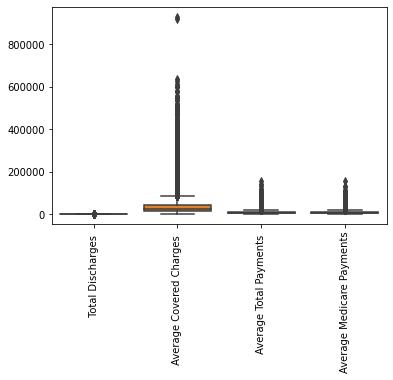

In [16]:
stats_df = df.drop(['Provider Id', 'Provider Zip Code'], axis=1)
sns.boxplot(data=stats_df)
plt.xticks(rotation='vertical')

In [17]:
#p1 = sns.heatmap(df[[' Total Discharges ',' Average Covered Charges ',' Average Total Payments ','Average Medicare Payments']])

Text(0.5, 1.0, 'Average Total Payments by State')

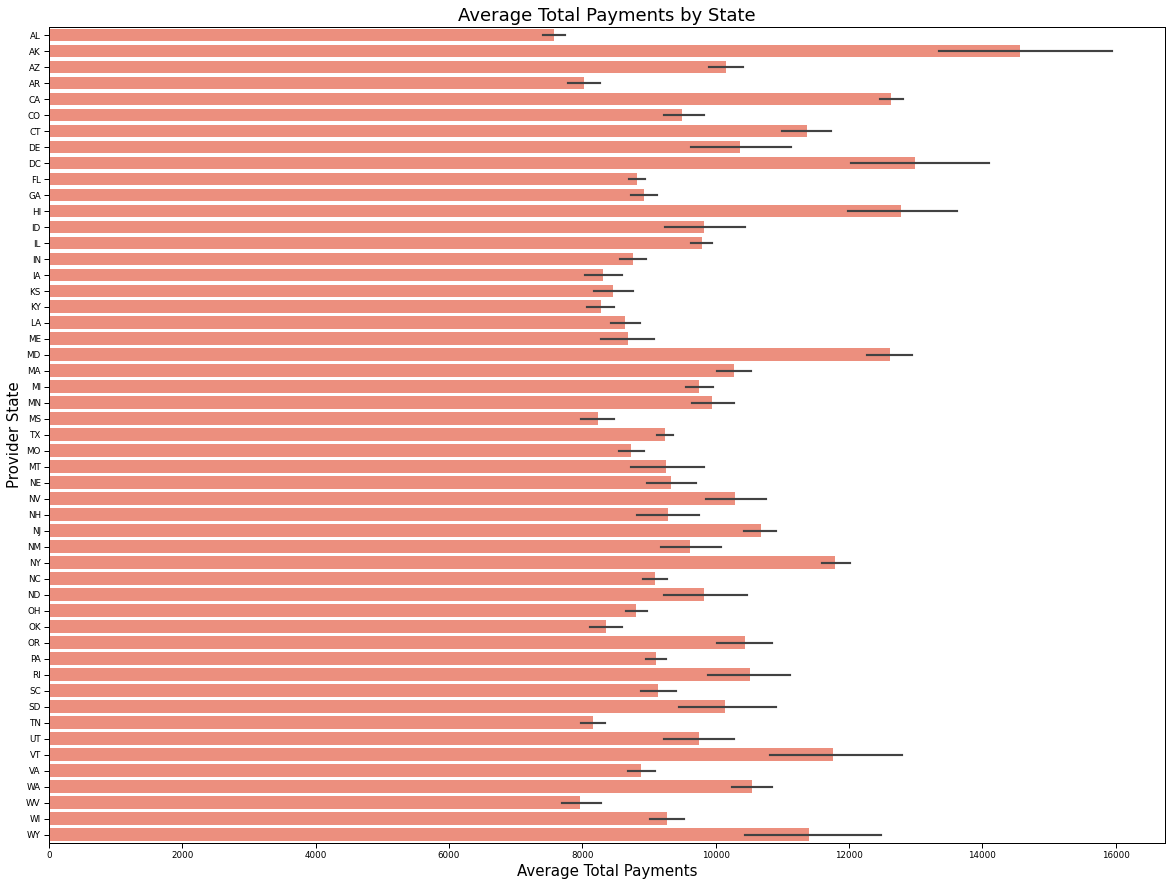

In [18]:
plt.figure(figsize=(20,15))
sns.set_context("paper")
ax = sns.barplot(data=df, x = df[" Average Total Payments "],y = df["Provider State"], color="tomato",alpha=0.8)
ax.set(ylabel=None)
plt.xlabel('Average Total Payments', fontsize=15)
plt.ylabel('Provider State', fontsize=15)
plt.title("Average Total Payments by State", fontsize=18)

Across the states, Aklohoma has the highest average total payments and also with the highest variance. This specific state probably needs to look into further to detect anomalies.

Text(0.5, 1.0, 'Total Discharges by State')

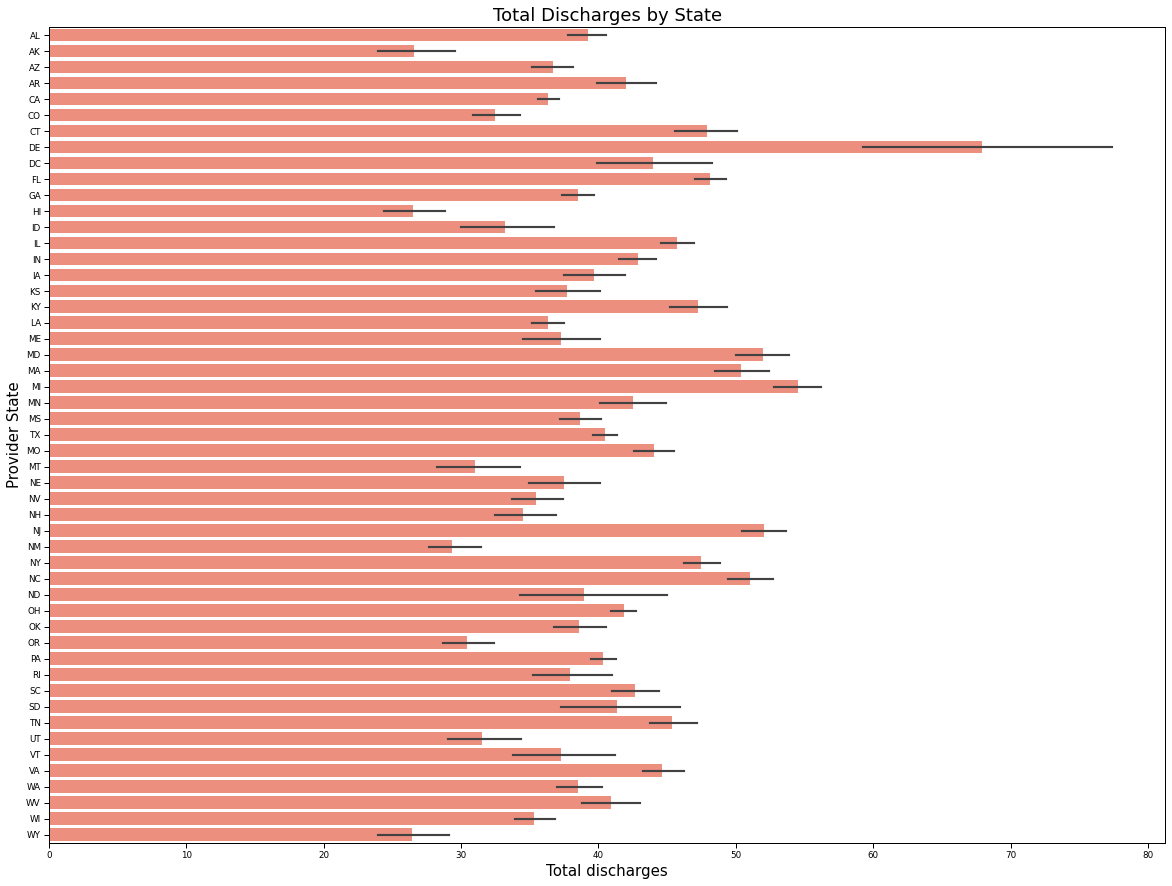

In [19]:
plt.figure(figsize=(20,15))
sns.set_context("paper")
ax = sns.barplot(data=df, x = df[" Total Discharges "],y = df["Provider State"], color="tomato",alpha=0.8)
ax.set(ylabel=None)
plt.xlabel('Total discharges', fontsize=15)
plt.ylabel('Provider State', fontsize=15)
plt.title("Total Discharges by State", fontsize=18)

As illustrated above, Delaware has highest number of total discharges, also with the highest variance. Similar to my previous analysis, this specific state also needs to be studied further for anomalies.

In [20]:
#trying to sort value, but didn't work
#df_ = df.sort_values(by = " Average Total Payments ", ascending = False)
#df_1=df[" Average Total Payments "].groupby(df['Provider State']).sum().sort_values(ascending = False)
#plt.figure(figsize=(13,10))
#sns.set_context("paper")
#ax = sns.barplot(data=df_1, x = df_1[" Average Total Payments "],y = df_1["Provider State"], color="tomato",alpha=0.8)
#ax.set(ylabel=None)

In [21]:
#plt.figure(figsize=(13,10))
#sns.set_context("paper")
#ax = sns.barplot(data=df, x = df[" Average Total Payments "],y = df["Provider State"], color="tomato",alpha=0.8)
#ax.set(ylabel=None)

In [22]:
#table1=df[' Total Discharges '].groupby(df['DRG Definition']).mean().sort_values(ascending = False)
#table1

In [23]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [24]:
import plotly.express as px

In [25]:
# this takes too long to run
#import plotly.graph_objects as go
#fig = go.Figure(data=go.Choropleth(
#    locations=df['Provider State'], # Spatial coordinates
#    z = df[' Average Covered Charges '] # Data to be color-coded
#    locationmode = 'USA-states', # set of locations match entries in `locations`
#    colorscale = 'Reds',
#    colorbar_title = "Average Covered Charges",
#))

#fig.update_layout(
#    title_text = 'Average Covered Charges',
#    geo_scope='usa', # limite map scope to USA
#)

#fig.show()

In [26]:
#fig  = plt.figure(figsize=(10,5))
#plt.bar(df["Provider State"], df[" Total Discharges "], align='center', alpha=0.5)
#plt.xlabel("Provider State")
#plt.ylabel("Total Discharges")
#plt.title('Total Discharges by state')
#plt.show()

# 3. Feature Engineering

## Aggregation by DRG definition
## The application and intuition behind this first aggregation is that anomalies lies in that the transactions that charge more  and more frenquent than others in the same DRG cateogory.

### 1. How does Average Total Discharges vary across different DRG definitions? (Aggregation by DRG definition)

#### In order to answer my first question, I have therefore aggregated " Average Total Discharges " on each "DRG definition" level. Specifically, I have created minimum, median, mean, maximum as well as standard deviation to describe this set of data. 

In [27]:
table1 = df.groupby(['DRG Definition']).agg({' Total Discharges ': ['min','median','mean','max','std']})
table1.columns = ['Minimum_Total_Discharge_by_DRG_definition','Median_Total_Discharge_by_DRG_definition', 'Average_Total_Discharge_by_DRG_definition','Maximum_Total_Discharge_by_DRG_definition','STD_of_Total_Discharge_by_DRG_definition']
table1 = table1.reset_index()
table1

,DRG Definition,Minimum_Total_Discharge_by_DRG_definition,Median_Total_Discharge_by_DRG_definition,Average_Total_Discharge_by_DRG_definition,Maximum_Total_Discharge_by_DRG_definition,STD_of_Total_Discharge_by_DRG_definition
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,11,23,31.145505,190,21.916526
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11,20,25.155704,224,16.997938
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11,28,37.427969,230,30.353766
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11,35,46.899074,303,37.634778
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11,25,30.924142,165,20.165254
...,...,...,...,...,...,...
95,885 - PSYCHOSES,11,81,146.383361,1696,200.754390
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,11,21,35.248344,1571,66.679850
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,11,17,20.109134,84,10.169931
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,11,18,21.146889,141,11.346277


In [28]:
table1_ =table1.sort_values(by= 'Average_Total_Discharge_by_DRG_definition',ascending = False).head(20)
table1_

,DRG Definition,Minimum_Total_Discharge_by_DRG_definition,Median_Total_Discharge_by_DRG_definition,Average_Total_Discharge_by_DRG_definition,Maximum_Total_Discharge_by_DRG_definition,STD_of_Total_Discharge_by_DRG_definition
68,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,11,104,155.348000,3383,170.735266
95,885 - PSYCHOSES,11,81,146.383361,1696,200.754390
93,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,11,81,113.467994,903,105.633398
61,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",11,61,83.001356,1344,76.557015
27,247 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,11,53,76.897727,981,85.416448
39,292 - HEART FAILURE & SHOCK W CC,11,55,75.190654,774,66.064823
86,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,11,53,69.151890,807,58.435267
38,291 - HEART FAILURE & SHOCK W MCC,11,51,69.072944,603,59.648904
37,"287 - CIRCULATORY DISORDERS EXCEPT AMI, W CARD...",11,49,67.083333,674,61.086941
17,194 - SIMPLE PNEUMONIA & PLEURISY W CC,11,53,65.626861,537,47.936227


In [29]:
df = df.merge(table1, how='left',on='DRG Definition')
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Minimum_Total_Discharge_by_DRG_definition,Median_Total_Discharge_by_DRG_definition,Average_Total_Discharge_by_DRG_definition,Maximum_Total_Discharge_by_DRG_definition,STD_of_Total_Discharge_by_DRG_definition
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,11,23,31.145505,190,21.916526
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,11,23,31.145505,190,21.916526
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,11,23,31.145505,190,21.916526
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,11,23,31.145505,190,21.916526
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,11,23,31.145505,190,21.916526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39,11,22,28.115449,244,19.207704
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72,11,22,28.115449,244,19.207704
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36,11,22,28.115449,244,19.207704
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54,11,22,28.115449,244,19.207704


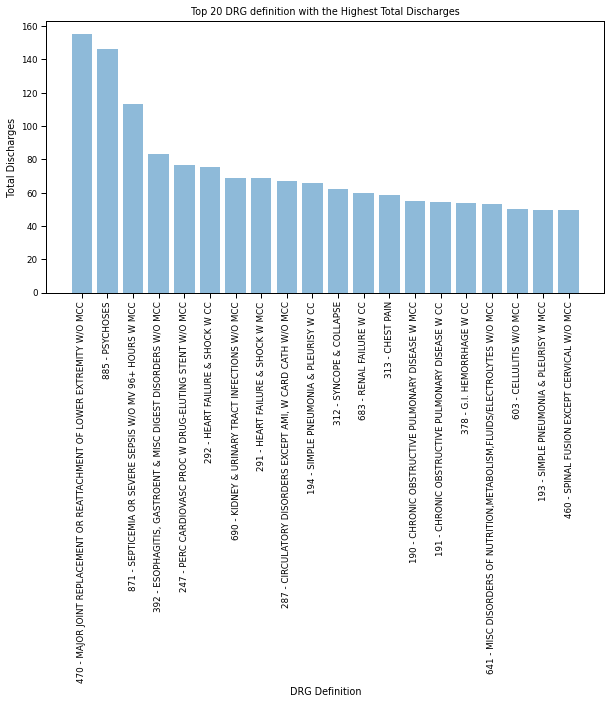

In [30]:
import matplotlib.pyplot as plt
fig  = plt.figure(figsize=(10,5))
plt.bar(table1_["DRG Definition"], table1_["Average_Total_Discharge_by_DRG_definition"], align='center', alpha=0.5)
plt.xlabel("DRG Definition")
plt.ylabel("Total Discharges")
plt.title('Top 20 DRG definition with the Highest Total Discharges')
plt.xticks(rotation='vertical')
plt.show()

On Average, top 20 most seeked treatments are listed above. Among these, top 3 are "470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC", "885-Psychoses", and "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC".

In [31]:
#create ratio
df["total discharge/Average_Total_Discharge_by_DRG_definition ratio"] = df[' Total Discharges '] / df["Average_Total_Discharge_by_DRG_definition"]

### 2. How does Average Total Payments vary across different DRG definitions? (Aggregation by DRG definition)

#### In order to answer my second question, I have therefore aggregated " Average Total Payments " on each "DRG definition" level. Specifically, I have created minimum, median, mean, maximum as well as standard deviation to describe this set of data. 

In [32]:
table2 = df.groupby(['DRG Definition']).agg({' Average Total Payments ': ['min','median','mean','max','std']})
table2.columns = ['Minimum_Total_Payment_by_DRG_definition','Median_Total_Payment_by_DRG_definition', 'Average_Total_Payment_by_DRG_definition','Maximum_Total_Payment_by_DRG_definition','STD_of_Total_Payment_by_DRG_definition']
table2 = table2.reset_index()
table2

,DRG Definition,Minimum_Total_Payment_by_DRG_definition,Median_Total_Payment_by_DRG_definition,Average_Total_Payment_by_DRG_definition,Maximum_Total_Payment_by_DRG_definition,STD_of_Total_Payment_by_DRG_definition
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,4968.00,6582.890,6960.534004,18420.56,1477.873952
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,4194.09,6093.750,6706.276445,25519.43,2033.965862
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8174.28,12084.700,13263.823032,50882.40,3847.918207
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,5368.73,7280.050,7922.671141,26510.15,2084.658336
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,3916.41,5326.025,5713.985221,14744.05,1342.538675
...,...,...,...,...,...,...
95,885 - PSYCHOSES,4444.90,6155.560,6968.721876,32200.77,2440.280958
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,3172.44,4529.535,4949.907307,18630.92,1462.463278
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,6942.83,10062.280,10763.814413,33251.14,2823.004637
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,3040.72,4136.105,4485.378734,12479.80,1154.328951


In [33]:
table2_ =table2.sort_values(by= 'Average_Total_Payment_by_DRG_definition',ascending = False).head(20)
table2_

,DRG Definition,Minimum_Total_Payment_by_DRG_definition,Median_Total_Payment_by_DRG_definition,Average_Total_Payment_by_DRG_definition,Maximum_Total_Payment_by_DRG_definition,STD_of_Total_Payment_by_DRG_definition
92,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,20536.64,40922.000,44259.485463,119028.90,11991.113537
91,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,22112.33,37316.860,40315.961432,140255.26,11495.182667
21,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,22311.53,35421.300,38588.920997,156158.18,11244.639674
52,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,20298.63,35463.045,37765.594295,101796.26,9821.786079
66,460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC,16771.81,26177.065,27778.671119,131187.35,6942.859587
26,246 - PERC CARDIOVASC PROC W DRUG-ELUTING STEN...,15513.60,22202.730,23326.339019,54231.54,5322.214394
30,252 - OTHER VASCULAR PROCEDURES W MCC,14352.70,21311.210,22845.639314,68646.38,5983.182830
67,469 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,12810.06,21230.505,22531.261513,100018.33,5732.965937
23,238 - MAJOR CARDIOVASC PROCEDURES W/O MCC,13233.16,20825.280,21948.545104,54682.48,4661.347511
70,480 - HIP & FEMUR PROCEDURES EXCEPT MAJOR JOIN...,12365.72,19533.180,20984.366652,61029.72,5053.115937


In [34]:
df = df.merge(table2, how='left',on='DRG Definition')
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Median_Total_Discharge_by_DRG_definition,Average_Total_Discharge_by_DRG_definition,Maximum_Total_Discharge_by_DRG_definition,STD_of_Total_Discharge_by_DRG_definition,total discharge/Average_Total_Discharge_by_DRG_definition ratio,Minimum_Total_Payment_by_DRG_definition,Median_Total_Payment_by_DRG_definition,Average_Total_Payment_by_DRG_definition,Maximum_Total_Payment_by_DRG_definition,STD_of_Total_Payment_by_DRG_definition
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,23,31.145505,190,21.916526,2.921770,4968.00,6582.89,6960.534004,18420.56,1477.873952
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,23,31.145505,190,21.916526,0.449503,4968.00,6582.89,6960.534004,18420.56,1477.873952
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,23,31.145505,190,21.916526,0.770577,4968.00,6582.89,6960.534004,18420.56,1477.873952
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,23,31.145505,190,21.916526,0.802684,4968.00,6582.89,6960.534004,18420.56,1477.873952
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,23,31.145505,190,21.916526,0.577933,4968.00,6582.89,6960.534004,18420.56,1477.873952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,22,28.115449,244,19.207704,0.818056,3247.66,4411.18,4824.766436,28968.20,1352.077957
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,22,28.115449,244,19.207704,0.391244,3247.66,4411.18,4824.766436,28968.20,1352.077957
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,22,28.115449,244,19.207704,0.675785,3247.66,4411.18,4824.766436,28968.20,1352.077957
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,22,28.115449,244,19.207704,0.391244,3247.66,4411.18,4824.766436,28968.20,1352.077957


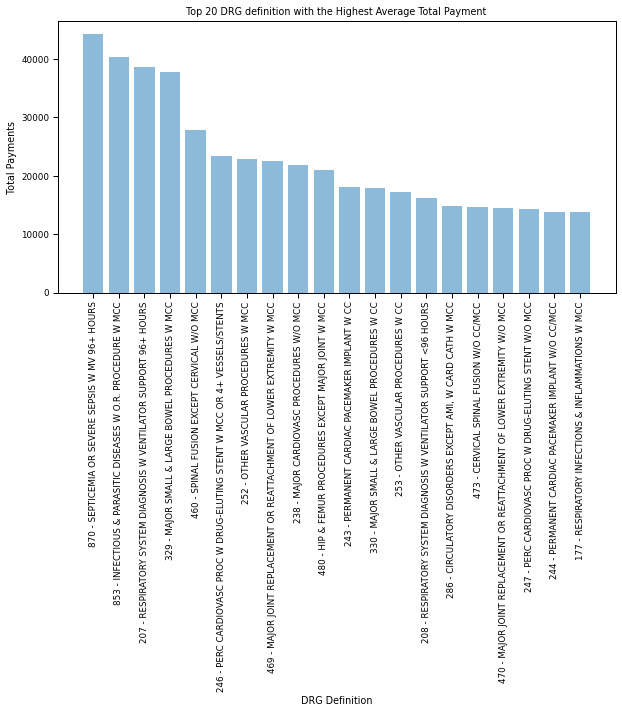

In [35]:
fig  = plt.figure(figsize=(10,5))
plt.bar(table2_["DRG Definition"], table2_["Average_Total_Payment_by_DRG_definition"], align='center', alpha=0.5)
plt.xlabel("DRG Definition")
plt.ylabel("Total Payments")
plt.title('Top 20 DRG definition with the Highest Average Total Payment')
plt.xticks(rotation='vertical')
plt.show()

On Average, top 20 DRG with the highest average total amount are listed above. Among these, top 5 are "870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS","853 - INFECTIOUS & PARASITIC DISEASES W O.R. PROCEDURE W MCC","207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATORS SUPPORT 96+ HOURS","329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC","460 - SPINAL FUSION EXCEPT CERVICAL W/O MCC". This list of top 20 doesn't completly overlap with the previous results in top 20 total discharges. This suggests that high total charges doesn't necessarily suggest high total payment, but of course this relationship needs to be studied further in order to reach to a definitive conclusion. 

In [36]:
#create ratio
df["avg total payments/Average_Total_Payment_by_DRG_definition"] = df[" Average Total Payments "] / df["Average_Total_Payment_by_DRG_definition"]

### 3. How does Average Total Payments vary across different DRG definitions in different regions? (Aggregation by DRG definition)

#### From the previous question, I have dived deeper to try to understand the difference across states. In order to answer my third question, I have therefore aggregated " Average Total Payments " on each "DRG definition" and "Provider State"level . Specifically, I have created minimum, median, mean, maximum as well as standard deviation to describe this set of data. 

In [37]:
table3 = df.groupby(['DRG Definition','Provider State']).agg({' Average Total Payments ': ['min','median','mean','max','std']})
table3.columns = ['Minimum_Total_Payment_by_DRG_definition_by_State','Median_Total_Payment_by_DRG_definition_by_State', 'Average_Total_Payment_by_DRG_definition_by_State','Maximum_Total_Payment_by_DRG_definition_by_State','STD_of_Total_Payment_by_DRG_definition_by_State']
table3 = table3.reset_index()
table3

,DRG Definition,Provider State,Minimum_Total_Payment_by_DRG_definition_by_State,Median_Total_Payment_by_DRG_definition_by_State,Average_Total_Payment_by_DRG_definition_by_State,Maximum_Total_Payment_by_DRG_definition_by_State,STD_of_Total_Payment_by_DRG_definition_by_State
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,8401.95,8401.950,8401.950000,8401.95,NaN
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,4968.00,5658.330,5743.611739,8031.12,628.702608
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,5225.59,5890.000,6118.828750,9838.11,1059.463235
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,5976.00,6959.890,7271.555833,11026.33,1283.210551
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,6390.25,7863.140,8387.932687,16744.82,1807.867216
...,...,...,...,...,...,...,...
5020,948 - SIGNS & SYMPTOMS W/O MCC,VT,5456.83,6097.540,6233.893333,7147.31,853.448787
5021,948 - SIGNS & SYMPTOMS W/O MCC,WA,4152.00,4981.725,5140.298667,8771.80,954.187396
5022,948 - SIGNS & SYMPTOMS W/O MCC,WI,3708.11,4482.470,4633.002308,7411.21,875.788500
5023,948 - SIGNS & SYMPTOMS W/O MCC,WV,3304.54,3790.255,4040.943889,5676.60,612.897980


In [38]:
table3_ =table3.sort_values(by= 'Average_Total_Payment_by_DRG_definition_by_State',ascending = False).head(20)
table3_

,DRG Definition,Provider State,Minimum_Total_Payment_by_DRG_definition_by_State,Median_Total_Payment_by_DRG_definition_by_State,Average_Total_Payment_by_DRG_definition_by_State,Maximum_Total_Payment_by_DRG_definition_by_State,STD_of_Total_Payment_by_DRG_definition_by_State
2608,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,AK,58446.47,68006.425,68006.425000,77566.38,13519.818017
4579,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,DC,42456.08,62113.595,66437.692500,99067.50,25628.831519
4623,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,AK,61300.63,61300.630,61300.630000,61300.63,NaN
4572,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,AK,57238.68,57238.680,57238.680000,57238.68,NaN
4583,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,HI,44938.57,54386.120,56482.922000,76092.84,11965.075707
4655,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,NY,31324.00,55198.170,56465.890641,119028.90,15181.224029
1049,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,AK,46105.58,54385.475,54385.475000,62665.37,11709.539804
4627,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,CA,29873.38,50332.275,53733.333710,109945.57,13743.096304
4667,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,VT,52761.33,52761.330,52761.330000,52761.33,NaN
4630,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,DC,37337.50,52959.250,52491.154000,78423.16,16154.718496


In [39]:
df = df.merge(table3, how='left',on=['DRG Definition','Provider State'])
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Median_Total_Payment_by_DRG_definition,Average_Total_Payment_by_DRG_definition,Maximum_Total_Payment_by_DRG_definition,STD_of_Total_Payment_by_DRG_definition,avg total payments/Average_Total_Payment_by_DRG_definition,Minimum_Total_Payment_by_DRG_definition_by_State,Median_Total_Payment_by_DRG_definition_by_State,Average_Total_Payment_by_DRG_definition_by_State,Maximum_Total_Payment_by_DRG_definition_by_State,STD_of_Total_Payment_by_DRG_definition_by_State
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,6582.89,6960.534004,18420.56,1477.873952,0.830000,4968.0,5658.33,5743.611739,8031.12,628.702608
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,6582.89,6960.534004,18420.56,1477.873952,0.831484,4968.0,5658.33,5743.611739,8031.12,628.702608
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,6582.89,6960.534004,18420.56,1477.873952,0.780824,4968.0,5658.33,5743.611739,8031.12,628.702608
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,6582.89,6960.534004,18420.56,1477.873952,0.778325,4968.0,5658.33,5743.611739,8031.12,628.702608
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,6582.89,6960.534004,18420.56,1477.873952,0.812916,4968.0,5658.33,5743.611739,8031.12,628.702608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,4411.18,4824.766436,28968.20,1352.077957,0.789025,3484.9,4367.96,4631.003966,8978.86,999.793824
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,4411.18,4824.766436,28968.20,1352.077957,0.834726,3484.9,4367.96,4631.003966,8978.86,999.793824
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,4411.18,4824.766436,28968.20,1352.077957,1.182308,3484.9,4367.96,4631.003966,8978.86,999.793824
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,4411.18,4824.766436,28968.20,1352.077957,1.588282,3484.9,4367.96,4631.003966,8978.86,999.793824


In [40]:
#create ratio
df["avg total payments/Average_Total_Payment_by_DRG_definition_by_State"] = df[" Average Total Payments "] / df['Average_Total_Payment_by_DRG_definition_by_State']

### 4. How does Average Covered Charges vary across different DRG definitions? (Aggregation by DRG definition) And how does average covered payment for each DRG definition vary by state?

In [41]:
table4 = df.groupby(['DRG Definition','Provider State']).agg({' Average Covered Charges ': ['min','median','mean','max','std']})
table4.columns = ['Minimum_Average_Covered_charges_by_DRG_definition_by_State','Median_Average_Covered_charges_by_DRG_definition_by_State', 'Average_Average_Covered_charges_by_DRG_definition_by_State','Maximum_Average_Covered_charges_by_DRG_definition_by_State','STD_Average_Covered_charges_by_DRG_definition_by_State']
table4 = table4.reset_index()
table4

,DRG Definition,Provider State,Minimum_Average_Covered_charges_by_DRG_definition_by_State,Median_Average_Covered_charges_by_DRG_definition_by_State,Average_Average_Covered_charges_by_DRG_definition_by_State,Maximum_Average_Covered_charges_by_DRG_definition_by_State,STD_Average_Covered_charges_by_DRG_definition_by_State
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,34805.13,34805.130,34805.130000,34805.13,NaN
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,9234.51,28523.390,32044.436957,75233.38,20153.076462
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,11057.06,23836.175,27463.263125,98388.77,20282.962492
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,15931.52,29746.300,33443.360417,60608.69,11299.237397
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,20227.66,53860.170,56094.930746,146892.00,22098.721960
...,...,...,...,...,...,...,...
5020,948 - SIGNS & SYMPTOMS W/O MCC,VT,8294.54,13390.000,12392.523333,15493.03,3701.457057
5021,948 - SIGNS & SYMPTOMS W/O MCC,WA,7714.85,18125.715,18737.713000,27692.32,4665.600836
5022,948 - SIGNS & SYMPTOMS W/O MCC,WI,7100.84,14217.160,14359.073846,23587.58,3194.599445
5023,948 - SIGNS & SYMPTOMS W/O MCC,WV,6331.55,10042.950,10098.507222,14454.92,2444.429402


In [42]:
table4_ =table4.sort_values(by= 'Average_Average_Covered_charges_by_DRG_definition_by_State',ascending = False).head(20)
table4_

,DRG Definition,Provider State,Minimum_Average_Covered_charges_by_DRG_definition_by_State,Median_Average_Covered_charges_by_DRG_definition_by_State,Average_Average_Covered_charges_by_DRG_definition_by_State,Maximum_Average_Covered_charges_by_DRG_definition_by_State,STD_Average_Covered_charges_by_DRG_definition_by_State
4627,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,CA,91451.68,261191.855,277004.642419,637377.71,109108.300093
1053,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,CA,96767.64,239810.040,263542.549727,929118.90,132991.912328
2612,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,CA,62861.18,244920.205,261315.859310,557900.75,96244.567350
4605,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,NV,108209.69,277154.035,257844.555000,401322.30,98600.761476
4576,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,CA,75798.16,236451.230,254341.504658,576296.00,96963.718431
4652,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,NJ,120542.34,218692.820,247313.996667,553512.92,103304.894588
4654,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,NV,137108.05,256638.285,241243.599167,298869.00,50464.157292
2641,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,NV,103633.60,257406.940,234328.771667,336811.75,78265.045943
1080,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,NJ,86225.92,213967.105,229715.441042,602981.37,102051.982335
1082,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,NV,105994.42,236519.225,227783.204375,379300.81,76357.540857


In [43]:
df = df.merge(table4, how='left',on=['DRG Definition','Provider State'])
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Median_Total_Payment_by_DRG_definition_by_State,Average_Total_Payment_by_DRG_definition_by_State,Maximum_Total_Payment_by_DRG_definition_by_State,STD_of_Total_Payment_by_DRG_definition_by_State,avg total payments/Average_Total_Payment_by_DRG_definition_by_State,Minimum_Average_Covered_charges_by_DRG_definition_by_State,Median_Average_Covered_charges_by_DRG_definition_by_State,Average_Average_Covered_charges_by_DRG_definition_by_State,Maximum_Average_Covered_charges_by_DRG_definition_by_State,STD_Average_Covered_charges_by_DRG_definition_by_State
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,5658.33,5743.611739,8031.12,628.702608,1.005855,9234.51,28523.390,32044.436957,75233.38,20153.076462
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,5658.33,5743.611739,8031.12,628.702608,1.007653,9234.51,28523.390,32044.436957,75233.38,20153.076462
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,5658.33,5743.611739,8031.12,628.702608,0.946260,9234.51,28523.390,32044.436957,75233.38,20153.076462
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,5658.33,5743.611739,8031.12,628.702608,0.943232,9234.51,28523.390,32044.436957,75233.38,20153.076462
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,5658.33,5743.611739,8031.12,628.702608,0.985152,9234.51,28523.390,32044.436957,75233.38,20153.076462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,4367.96,4631.003966,8978.86,999.793824,0.822038,5724.00,20704.715,21210.972931,39937.26,7640.188800
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,4367.96,4631.003966,8978.86,999.793824,0.869652,5724.00,20704.715,21210.972931,39937.26,7640.188800
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,4367.96,4631.003966,8978.86,999.793824,1.231776,5724.00,20704.715,21210.972931,39937.26,7640.188800
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,4367.96,4631.003966,8978.86,999.793824,1.654736,5724.00,20704.715,21210.972931,39937.26,7640.188800


In [44]:
#create ratio
df["avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State"] = df[" Average Covered Charges "] / df["Average_Average_Covered_charges_by_DRG_definition_by_State"]

### 5. How does Average Medicare Payments vary across different DRG definitions? (Aggregation by DRG definition) And how does average medicare payment for each DRG definition vary by state?

In [45]:
table5 = df.groupby(['DRG Definition','Provider State']).agg({'Average Medicare Payments': ['min','median','mean','max','std']})
table5.columns = ['Minimum_Average_Medicare_Payments_by_DRG_definition_by_State','Median_Average_Medicare_Payments_by_DRG_definition_by_State', 'Average_Average_Medicare_Payments_by_DRG_definition_by_State','Maximum_Average_Medicare_Payments_by_DRG_definition_by_State','STD_Average_Medicare_Payments_by_DRG_definition_by_State']
table5 = table5.reset_index()
table5

,DRG Definition,Provider State,Minimum_Average_Medicare_Payments_by_DRG_definition_by_State,Median_Average_Medicare_Payments_by_DRG_definition_by_State,Average_Average_Medicare_Payments_by_DRG_definition_by_State,Maximum_Average_Medicare_Payments_by_DRG_definition_by_State,STD_Average_Medicare_Payments_by_DRG_definition_by_State
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AK,6413.78,6413.780,6413.780000,6413.78,NaN
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AL,3898.88,4471.680,4599.593043,5858.50,495.053654
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AR,4068.10,4607.400,4938.712500,8533.83,1047.759874
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,AZ,3592.85,5669.805,5912.832917,9056.06,1179.691505
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,CA,5009.94,6639.330,6878.954925,11483.40,1295.182568
...,...,...,...,...,...,...,...
5020,948 - SIGNS & SYMPTOMS W/O MCC,VT,4705.72,5380.090,5270.430000,5725.48,518.648823
5021,948 - SIGNS & SYMPTOMS W/O MCC,WA,2786.66,3789.705,3883.211333,6833.42,717.397134
5022,948 - SIGNS & SYMPTOMS W/O MCC,WI,2647.18,3363.280,3587.934359,6406.05,744.605258
5023,948 - SIGNS & SYMPTOMS W/O MCC,WV,2484.18,3168.590,3278.828333,5047.02,640.523421


In [46]:
table5_ =table5.sort_values(by= 'Average_Average_Medicare_Payments_by_DRG_definition_by_State',ascending = False).head(20)
table5_

,DRG Definition,Provider State,Minimum_Average_Medicare_Payments_by_DRG_definition_by_State,Median_Average_Medicare_Payments_by_DRG_definition_by_State,Average_Average_Medicare_Payments_by_DRG_definition_by_State,Maximum_Average_Medicare_Payments_by_DRG_definition_by_State,STD_Average_Medicare_Payments_by_DRG_definition_by_State
2608,329 - MAJOR SMALL & LARGE BOWEL PROCEDURES W MCC,AK,50683.56,63646.045,63646.045000,76608.53,18331.722089
4579,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,DC,40698.57,55834.630,62017.312500,95701.42,25352.612216
4572,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,AK,56421.13,56421.130,56421.130000,56421.13,NaN
4655,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,NY,29889.08,53042.120,54308.148718,107456.18,15214.936182
1049,207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATO...,AK,45290.25,53626.060,53626.060000,61961.87,11788.615555
4667,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,VT,52139.55,52139.550,52139.550000,52139.55,NaN
4627,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,CA,28341.30,47943.685,51697.026371,109303.21,13806.363219
4623,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,AK,50947.54,50947.540,50947.540000,50947.54,NaN
4658,870 - SEPTICEMIA OR SEVERE SEPSIS W MV 96+ HOURS,OR,44418.77,49185.040,49581.353333,55140.25,5371.715884
4606,853 - INFECTIOUS & PARASITIC DISEASES W O.R. P...,NY,26244.57,47294.420,49106.827442,133177.26,16303.822521


In [47]:
df = df.merge(table5, how='left',on=['DRG Definition','Provider State'])
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Median_Average_Covered_charges_by_DRG_definition_by_State,Average_Average_Covered_charges_by_DRG_definition_by_State,Maximum_Average_Covered_charges_by_DRG_definition_by_State,STD_Average_Covered_charges_by_DRG_definition_by_State,avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State,Minimum_Average_Medicare_Payments_by_DRG_definition_by_State,Median_Average_Medicare_Payments_by_DRG_definition_by_State,Average_Average_Medicare_Payments_by_DRG_definition_by_State,Maximum_Average_Medicare_Payments_by_DRG_definition_by_State,STD_Average_Medicare_Payments_by_DRG_definition_by_State
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,28523.390,32044.436957,75233.38,20153.076462,1.028667,3898.88,4471.680,4599.593043,5858.50,495.053654
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,28523.390,32044.436957,75233.38,20153.076462,0.472215,3898.88,4471.680,4599.593043,5858.50,495.053654
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,28523.390,32044.436957,75233.38,20153.076462,1.172134,3898.88,4471.680,4599.593043,5858.50,495.053654
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,28523.390,32044.436957,75233.38,20153.076462,0.436840,3898.88,4471.680,4599.593043,5858.50,495.053654
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,28523.390,32044.436957,75233.38,20153.076462,0.987169,3898.88,4471.680,4599.593043,5858.50,495.053654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,20704.715,21210.972931,39937.26,7640.188800,1.240603,2194.66,3449.405,3738.929741,8544.93,1059.522393
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,20704.715,21210.972931,39937.26,7640.188800,1.023278,2194.66,3449.405,3738.929741,8544.93,1059.522393
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,20704.715,21210.972931,39937.26,7640.188800,1.844410,2194.66,3449.405,3738.929741,8544.93,1059.522393
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,20704.715,21210.972931,39937.26,7640.188800,1.361234,2194.66,3449.405,3738.929741,8544.93,1059.522393


In [48]:
#create ratio
df["avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State"] = df['Average Medicare Payments'] / df['Average_Average_Medicare_Payments_by_DRG_definition_by_State']

## Aggregation On Hospital
## The application and intuition behind this second aggregation is that anomalies happen when a hospital charge more and more frequently than its peers in the same region. Here I took into the consideration the variation in prices across the states in order to make future comparison to this set of values more objective and reasonable.

### 6. How does Total Discharges vary across different providers? (Aggregation by hospital)

In [49]:
table6 = df.groupby(['Provider Id','Provider Name','Provider Zip Code']).agg({' Total Discharges ': ['min','median','mean','max','std','sum']})
table6.columns = ['Minimum_Total_Discharge_by_Hospital','Median_Total_Discharge_by_Hospital','Average_Total_Discharge_by_Hospital','Maximum_Total_Discharge_by_Hospital','STD_of_Total_Discharge_by_Hospital','Sum_of_Total_Discharge_by_Hospital']
table6 = table6.reset_index()
table6

,Provider Id,Provider Name,Provider Zip Code,Minimum_Total_Discharge_by_Hospital,Median_Total_Discharge_by_Hospital,Average_Total_Discharge_by_Hospital,Maximum_Total_Discharge_by_Hospital,STD_of_Total_Discharge_by_Hospital,Sum_of_Total_Discharge_by_Hospital
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,11,37.5,58.750000,295,53.699535,5405
1,10005,MARSHALL MEDICAL CENTER SOUTH,35957,11,23.0,28.959184,85,18.255090,1419
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,35631,11,27.0,45.360465,211,39.979675,3901
3,10007,MIZELL MEMORIAL HOSPITAL,36467,11,24.0,27.409091,71,16.413290,603
4,10008,CRENSHAW COMMUNITY HOSPITAL,36049,11,17.0,17.888889,35,7.524036,161
...,...,...,...,...,...,...,...,...,...
3332,670072,"WESTBURY COMMUNITY HOSPITAL, LLC",77035,553,553.0,553.000000,553,NaN,553
3333,670073,METHODIST HOSPITAL FOR SURGERY,75001,20,44.0,54.750000,111,43.091956,219
3334,670075,"ST LUKE'S HOSPITAL AT THE VINTAGE, LLC",77070,11,12.5,13.500000,18,2.880972,81
3335,670076,HERITAGE PARK SURGICAL HOSPITAL,75090,18,18.0,18.000000,18,NaN,18


In [50]:
table6_ =table6.sort_values(by= 'Average_Total_Discharge_by_Hospital',ascending = False).head(20)
table6_

,Provider Id,Provider Name,Provider Zip Code,Minimum_Total_Discharge_by_Hospital,Median_Total_Discharge_by_Hospital,Average_Total_Discharge_by_Hospital,Maximum_Total_Discharge_by_Hospital,STD_of_Total_Discharge_by_Hospital,Sum_of_Total_Discharge_by_Hospital
1444,220062,ADCARE HOSPITAL OF WORCESTER INC,1605,1571,1571.0,1571.000000,1571,NaN,1571
3332,670072,"WESTBURY COMMUNITY HOSPITAL, LLC",77035,553,553.0,553.000000,553,NaN,553
2058,330270,HOSPITAL FOR SPECIAL SURGERY,10021,14,62.5,494.500000,3383,1169.607871,3956
2294,360247,"WOODS AT PARKSIDE,THE",43230,431,431.0,431.000000,431,NaN,431
206,40147,ARKANSAS SURGICAL HOSPITAL,72118,96,199.5,306.750000,732,296.017314,1227
3285,520205,"MIDWEST ORTHOPEDIC SPECIALTY HOSPITAL, LLC",53132,293,293.0,293.000000,293,NaN,293
1189,170188,KANSAS CITY ORTHOPAEDIC INSTITUTE,66211,260,260.0,260.000000,260,NaN,260
599,100007,FLORIDA HOSPITAL,32803,28,189.5,258.280000,1344,232.412863,25828
2298,360266,MOUNT CARMEL NEW ALBANY SURGICAL HOSPITAL,43054,44,120.5,250.000000,715,316.367929,1000
1185,170183,KANSAS SURGERY & RECOVERY CENTER,67226,13,245.5,245.500000,478,328.804653,491


In [51]:
df = df.merge(table6, how='left',on=['Provider Id','Provider Name','Provider Zip Code'])
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Average_Average_Medicare_Payments_by_DRG_definition_by_State,Maximum_Average_Medicare_Payments_by_DRG_definition_by_State,STD_Average_Medicare_Payments_by_DRG_definition_by_State,avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State,Minimum_Total_Discharge_by_Hospital,Median_Total_Discharge_by_Hospital,Average_Total_Discharge_by_Hospital,Maximum_Total_Discharge_by_Hospital,STD_of_Total_Discharge_by_Hospital,Sum_of_Total_Discharge_by_Hospital
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,4599.593043,5858.50,495.053654,1.035685,11,37.5,58.750000,295,53.699535,5405
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,4599.593043,5858.50,495.053654,1.081989,11,23.0,28.959184,85,18.255090,1419
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,4599.593043,5858.50,495.053654,0.968301,11,27.0,45.360465,211,39.979675,3901
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,4599.593043,5858.50,495.053654,0.897723,11,23.0,33.528736,228,31.139909,2917
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,4599.593043,5858.50,495.053654,1.054754,11,23.0,31.487500,119,23.669129,2519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,3738.929741,8544.93,1059.522393,0.821462,11,22.5,28.189655,101,18.410959,1635
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,3738.929741,8544.93,1059.522393,0.708684,11,21.0,27.775862,128,20.160795,1611
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,3738.929741,8544.93,1059.522393,1.085434,11,18.5,23.880952,85,15.628620,1003
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,3738.929741,8544.93,1059.522393,1.831685,11,17.0,25.825000,81,17.413357,1033


In [52]:
#create ratio
df['total_discharges/Average_Total_Discharge_by_Hospital'] = df[' Total Discharges '] / df['Average_Total_Discharge_by_Hospital']

### 7. How does Average Total Payments vary across different providers? (Aggregation by hospital)

In [53]:
table7 = df.groupby(['Provider Id','Provider Name','Provider Zip Code']).agg({' Average Total Payments ':['min','median','mean','max','std','sum']})
table7.columns = ['Minimum_Total_Payment_by_Hospital','Median_Total_Payment_by_Hospital', 'Average_Total_Payment_by_Hospital','Maximum_Total_Payment_by_Hospital','STD_of_Total_Payment_by_Hospital','Sum_of_Total_Payment_by_Hospital']
table7 = table7.reset_index()
table7

,Provider Id,Provider Name,Provider Zip Code,Minimum_Total_Payment_by_Hospital,Median_Total_Payment_by_Hospital,Average_Total_Payment_by_Hospital,Maximum_Total_Payment_by_Hospital,STD_of_Total_Payment_by_Hospital,Sum_of_Total_Payment_by_Hospital
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,3297.72,6577.240,8749.025109,33048.20,6038.338768,804910.31
1,10005,MARSHALL MEDICAL CENTER SOUTH,35957,3415.15,5933.950,6812.131224,14054.36,2717.731770,333794.43
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,35631,3046.81,6148.055,8197.237907,33721.47,5630.866929,704962.46
3,10007,MIZELL MEMORIAL HOSPITAL,36467,2808.08,4072.535,4860.829091,11275.00,2114.963759,106938.24
4,10008,CRENSHAW COMMUNITY HOSPITAL,36049,4979.66,5213.910,5898.136667,8594.92,1281.638636,53083.23
...,...,...,...,...,...,...,...,...,...
3332,670072,"WESTBURY COMMUNITY HOSPITAL, LLC",77035,4637.26,4637.260,4637.260000,4637.26,NaN,4637.26
3333,670073,METHODIST HOSPITAL FOR SURGERY,75001,5086.60,12175.240,12670.465000,21244.78,6627.593463,50681.86
3334,670075,"ST LUKE'S HOSPITAL AT THE VINTAGE, LLC",77070,4009.66,5249.500,5255.138333,6365.36,991.242272,31530.83
3335,670076,HERITAGE PARK SURGICAL HOSPITAL,75090,10063.77,10063.770,10063.770000,10063.77,NaN,10063.77


In [54]:
table7_ =table7.sort_values(by= 'Average_Total_Payment_by_Hospital',ascending = False).head(20)
table7_

,Provider Id,Provider Name,Provider Zip Code,Minimum_Total_Payment_by_Hospital,Median_Total_Payment_by_Hospital,Average_Total_Payment_by_Hospital,Maximum_Total_Payment_by_Hospital,STD_of_Total_Payment_by_Hospital,Sum_of_Total_Payment_by_Hospital
3143,490142,UVA HEALTH SCIENCES CENTER,22908,50552.61,50552.610,50552.610000,50552.61,NaN,50552.61
540,60096,VAIL VALLEY MEDICAL CENTER,81657,30632.92,42446.710,42446.710000,54260.50,16707.222041,84893.42
3024,450880,BAYLOR SURGICAL HOSPITAL AT FORT WORTH,76104,14885.31,38686.280,33700.880000,47531.05,16884.215851,101102.64
3325,670059,ST LUKES LAKESIDE HOSPITAL,77384,8856.08,20017.245,28576.585000,65415.77,25199.354720,114306.34
1102,150166,PINNACLE HOSPITAL,46307,3699.57,4834.250,25936.037143,131187.35,47197.618135,181552.26
420,50528,MEMORIAL HOSPITAL LOS BANOS,93635,14081.00,26186.335,25592.872500,39366.23,8123.019742,204742.98
3295,530015,ST JOHNS MEDICAL CENTER,83001,10920.08,22607.100,25329.143333,42460.25,15945.304037,75987.43
395,50441,STANFORD HOSPITAL,94305,7302.27,16617.430,24354.784138,156158.18,22678.282842,2118866.22
398,50454,UCSF MEDICAL CENTER,94143,7729.93,16802.150,23364.711750,97551.88,18674.541125,1869176.94
2040,330234,WESTCHESTER MEDICAL CENTER,10595,6228.24,15349.250,22982.272933,140255.26,24388.185709,1723670.47


In [55]:
df = df.merge(table7, how='left',on=['Provider Id','Provider Name','Provider Zip Code'])
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Maximum_Total_Discharge_by_Hospital,STD_of_Total_Discharge_by_Hospital,Sum_of_Total_Discharge_by_Hospital,total_discharges/Average_Total_Discharge_by_Hospital,Minimum_Total_Payment_by_Hospital,Median_Total_Payment_by_Hospital,Average_Total_Payment_by_Hospital,Maximum_Total_Payment_by_Hospital,STD_of_Total_Payment_by_Hospital,Sum_of_Total_Payment_by_Hospital
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,295,53.699535,5405,1.548936,3297.72,6577.240,8749.025109,33048.20,6038.338768,804910.31
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,85,18.255090,1419,0.483439,3415.15,5933.950,6812.131224,14054.36,2717.731770,333794.43
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,211,39.979675,3901,0.529095,3046.81,6148.055,8197.237907,33721.47,5630.866929,704962.46
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,228,31.139909,2917,0.745629,2997.00,6294.290,8181.648391,35806.53,5546.045094,711803.41
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,119,23.669129,2519,0.571655,3237.92,6421.220,7789.416250,29735.09,4550.105983,623153.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,101,18.410959,1635,0.815902,3105.74,5725.690,7535.292069,30150.47,5042.803667,437046.94
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,128,20.160795,1611,0.396027,3272.16,6184.750,8152.316207,42502.38,6241.005217,472834.34
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,85,15.628620,1003,0.795613,3662.88,8000.450,9101.177857,25552.23,4793.508856,382249.47
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,81,17.413357,1033,0.425944,5764.53,10807.955,11174.902500,19516.16,3705.328401,446996.10


In [56]:
#create ratio
df['avg total payment/Average_Total_Payment_by_Hospital'] = df[' Average Total Payments '] / df['Average_Total_Payment_by_Hospital']

### 8. How does Average Covered Charges vary across different providers? (Aggregation by hospital)

In [57]:
table8 = df.groupby(['Provider Id','Provider Name','Provider Zip Code']).agg({' Average Covered Charges ':['min','median','mean','max','std','sum']})
table8.columns = ['Minimum_Covered_Charges_by_Hospital','Median_Covered_Charges_by_Hospital', 'Average_Covered_Charges_by_Hospital','Maximum_Covered_Charges_by_Hospital','STD_Covered_Charges_by_Hospital','Sum_of_Covered_Charges_by_Hospital']
table8 = table8.reset_index()
table8

,Provider Id,Provider Name,Provider Zip Code,Minimum_Covered_Charges_by_Hospital,Median_Covered_Charges_by_Hospital,Average_Covered_Charges_by_Hospital,Maximum_Covered_Charges_by_Hospital,STD_Covered_Charges_by_Hospital,Sum_of_Covered_Charges_by_Hospital
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,10889.05,27526.755,35247.028152,129694.04,22283.409729,3242726.59
1,10005,MARSHALL MEDICAL CENTER SOUTH,35957,4973.93,14110.510,16451.092041,46095.22,8966.471360,806103.51
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,35631,10376.13,27648.075,36942.357442,160186.05,26607.064926,3177042.74
3,10007,MIZELL MEMORIAL HOSPITAL,36467,5604.57,8685.525,12079.536818,41182.94,8162.204048,265749.81
4,10008,CRENSHAW COMMUNITY HOSPITAL,36049,8937.72,13040.550,16148.752222,29986.35,7763.367885,145338.77
...,...,...,...,...,...,...,...,...,...
3332,670072,"WESTBURY COMMUNITY HOSPITAL, LLC",77035,9132.27,9132.270,9132.270000,9132.27,NaN,9132.27
3333,670073,METHODIST HOSPITAL FOR SURGERY,75001,14542.70,26584.230,26091.035000,36652.98,9147.655241,104364.14
3334,670075,"ST LUKE'S HOSPITAL AT THE VINTAGE, LLC",77070,24672.54,29258.055,33840.385000,53976.81,10979.134849,203042.31
3335,670076,HERITAGE PARK SURGICAL HOSPITAL,75090,33310.61,33310.610,33310.610000,33310.61,NaN,33310.61


In [58]:
table8_ =table8.sort_values(by= 'Average_Covered_Charges_by_Hospital',ascending = False).head(20)
table8_

,Provider Id,Provider Name,Provider Zip Code,Minimum_Covered_Charges_by_Hospital,Median_Covered_Charges_by_Hospital,Average_Covered_Charges_by_Hospital,Maximum_Covered_Charges_by_Hospital,STD_Covered_Charges_by_Hospital,Sum_of_Covered_Charges_by_Hospital
3143,490142,UVA HEALTH SCIENCES CENTER,22908,211922.00,211922.000,211922.000000,211922.00,NaN,211922.00
1845,310025,BAYONNE HOSPITAL CENTER,7002,61240.63,124651.865,147441.334000,517753.94,83294.863038,8846480.04
401,50464,DOCTORS MEDICAL CENTER,95350,63457.11,119861.045,144695.833286,557900.75,87251.037683,10128708.33
395,50441,STANFORD HOSPITAL,94305,40985.51,101352.430,138818.649770,929118.90,126575.960999,12077222.53
372,50367,NORTHBAY MEDICAL CENTER,94533,59843.76,104321.780,138504.546230,628730.40,108096.352675,8448777.32
2531,390180,CROZER CHESTER MEDICAL CENTER,19013,44486.38,109496.250,137130.847732,596410.26,100346.876791,13301692.23
306,50195,WASHINGTON HOSPITAL,94538,41756.92,90120.875,131510.122375,918023.18,127778.781202,10520809.79
342,50289,SETON MEDICAL CENTER,94015,42573.45,101345.160,130177.362615,517956.62,101331.790574,8461528.57
2441,390027,TEMPLE UNIVERSITY HOSPITAL,19140,40822.25,92586.240,126824.325139,613926.60,105078.805230,9131351.41
275,50125,REGIONAL MEDICAL CENTER OF SAN JOSE,95116,44920.25,90458.880,126288.693562,549826.00,91136.341349,9219074.63


In [59]:
df = df.merge(table8, how='left',on=['Provider Id','Provider Name','Provider Zip Code'])
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Maximum_Total_Payment_by_Hospital,STD_of_Total_Payment_by_Hospital,Sum_of_Total_Payment_by_Hospital,avg total payment/Average_Total_Payment_by_Hospital,Minimum_Covered_Charges_by_Hospital,Median_Covered_Charges_by_Hospital,Average_Covered_Charges_by_Hospital,Maximum_Covered_Charges_by_Hospital,STD_Covered_Charges_by_Hospital,Sum_of_Covered_Charges_by_Hospital
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,33048.20,6038.338768,804910.31,0.660330,10889.05,27526.755,35247.028152,129694.04,22283.409729,3242726.59
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,14054.36,2717.731770,333794.43,0.849598,4973.93,14110.510,16451.092041,46095.22,8966.471360,806103.51
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,33721.47,5630.866929,704962.46,0.663022,10376.13,27648.075,36942.357442,160186.05,26607.064926,3177042.74
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,35806.53,5546.045094,711803.41,0.662160,7881.37,22074.080,27757.640000,121698.53,18685.542006,2414914.68
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,29735.09,4550.105983,623153.30,0.726413,14105.11,32562.735,39728.130250,142560.71,22587.866032,3178250.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,30150.47,5042.803667,437046.94,0.505204,17659.43,37862.055,45843.142586,127881.64,26015.688301,2658902.27
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,42502.38,6241.005217,472834.34,0.494014,16581.43,32282.270,40209.005345,172852.38,27358.225081,2332122.31
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,25552.23,4793.508856,382249.47,0.626772,21259.61,42516.895,50232.529762,125300.92,25182.237655,2109766.25
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,19516.16,3705.328401,446996.10,0.685741,19342.58,37615.650,41962.343000,103179.56,19086.349991,1678493.72


In [60]:
#create ratio
df['avg covered charges/Average_Covered_Charges_by_Hospital'] = df[' Average Covered Charges '] / df['Average_Covered_Charges_by_Hospital']

### 9. How does Average Medicare Payments vary across different providers? (Aggregation by hospital)


In [61]:
table9 = df.groupby(['Provider Id','Provider Name','Provider Zip Code']).agg({'Average Medicare Payments':['min','median','mean','max','std','sum']})
table9.columns = ['Minimum_Medicare_Payment_by_Hospital','Median_Medicare_Payment_by_Hospital', 'Average_Medicare_Payment_by_Hospital','Maximum_Medicare_Payment_by_Hospital','STD_Medicare_Payment_by_Hospital','SUM_of_Medicare_Payment_by_Hospital']
table9 = table9.reset_index()
table9

,Provider Id,Provider Name,Provider Zip Code,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,36301,2093.38,5683.385,7678.214348,32095.75,5990.735366,706395.72
1,10005,MARSHALL MEDICAL CENTER SOUTH,35957,2467.15,4976.710,5793.631429,13342.72,2784.451480,283887.94
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,35631,1704.53,5228.300,7145.959535,32248.64,5636.247698,614552.52
3,10007,MIZELL MEMORIAL HOSPITAL,36467,1872.38,3328.590,4047.025455,9868.64,2097.658326,89034.56
4,10008,CRENSHAW COMMUNITY HOSPITAL,36049,3864.78,4375.410,4963.547778,7540.21,1336.250353,44671.93
...,...,...,...,...,...,...,...,...,...
3332,670072,"WESTBURY COMMUNITY HOSPITAL, LLC",77035,3894.55,3894.550,3894.550000,3894.55,NaN,3894.55
3333,670073,METHODIST HOSPITAL FOR SURGERY,75001,4018.95,8164.150,9176.107500,16357.18,5177.239002,36704.43
3334,670075,"ST LUKE'S HOSPITAL AT THE VINTAGE, LLC",77070,2694.27,4132.355,4116.481667,5645.00,1096.868255,24698.89
3335,670076,HERITAGE PARK SURGICAL HOSPITAL,75090,8491.44,8491.440,8491.440000,8491.44,NaN,8491.44


In [62]:
table9_ =table9.sort_values(by= 'Average_Medicare_Payment_by_Hospital',ascending = False).head(20)
table9_

,Provider Id,Provider Name,Provider Zip Code,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital
3143,490142,UVA HEALTH SCIENCES CENTER,22908,41836.88,41836.880,41836.880000,41836.88,NaN,41836.88
540,60096,VAIL VALLEY MEDICAL CENTER,81657,26689.67,39943.165,39943.165000,53196.66,18743.272378,79886.33
1102,150166,PINNACLE HOSPITAL,46307,2810.14,3962.480,25098.252857,130466.57,47232.947276,175687.77
420,50528,MEMORIAL HOSPITAL LOS BANOS,93635,13372.27,25552.295,24755.282500,38050.61,8005.076640,198042.26
3295,530015,ST JOHNS MEDICAL CENTER,83001,10071.08,21555.220,24350.486667,41425.16,15862.840854,73051.46
395,50441,STANFORD HOSPITAL,94305,6551.16,15750.170,23256.582529,154620.81,22554.004045,2023322.68
3325,670059,ST LUKES LAKESIDE HOSPITAL,77384,6947.91,15956.480,22846.092500,52523.50,20262.179627,91384.37
398,50454,UCSF MEDICAL CENTER,94143,6722.81,15633.270,21482.205625,94894.77,17443.123231,1718576.45
2040,330234,WESTCHESTER MEDICAL CENTER,10595,5416.23,14638.330,21481.303733,133177.26,23336.810167,1611097.78
332,50262,RONALD REAGAN UCLA MEDICAL CENTER,90095,6390.61,15333.000,21441.618261,101717.82,16974.974372,1479471.66


In [63]:
df = df.merge(table9, how='left',on=['Provider Id','Provider Name','Provider Zip Code'])
df

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,Maximum_Covered_Charges_by_Hospital,STD_Covered_Charges_by_Hospital,Sum_of_Covered_Charges_by_Hospital,avg covered charges/Average_Covered_Charges_by_Hospital,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,129694.04,22283.409729,3242726.59,0.935201,2093.38,5683.385,7678.214348,32095.75,5990.735366,706395.72
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,46095.22,8966.471360,806103.51,0.919808,2467.15,4976.710,5793.631429,13342.72,2784.451480,283887.94
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,160186.05,26607.064926,3177042.74,1.016729,1704.53,5228.300,7145.959535,32248.64,5636.247698,614552.52
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,121698.53,18685.542006,2414914.68,0.504304,2076.82,4842.360,6810.429310,29393.46,5032.249163,592507.35
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,142560.71,22587.866032,3178250.42,0.796244,2116.02,5183.575,6563.419000,29031.62,4435.211822,525073.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,...,127881.64,26015.688301,2658902.27,0.574009,2189.00,5071.070,6375.954483,26661.64,4761.890854,369805.36
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,...,172852.38,27358.225081,2332122.31,0.539797,2184.15,5075.630,6957.479483,39806.23,5978.676230,403533.81
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,...,125300.92,25182.237655,2109766.25,0.778813,2532.05,6601.620,7775.728333,24492.76,4805.933863,326580.59
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,...,103179.56,19086.349991,1678493.72,0.688071,4880.78,9704.555,10129.046750,18861.16,3641.872443,405161.87


In [64]:
#create ratio
df['avg medicare payment/Average_Medicare_Payment_by_Hospital'] = df['Average Medicare Payments'] / df['Average_Medicare_Payment_by_Hospital']

In [65]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,STD_Covered_Charges_by_Hospital,Sum_of_Covered_Charges_by_Hospital,avg covered charges/Average_Covered_Charges_by_Hospital,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital,avg medicare payment/Average_Medicare_Payment_by_Hospital
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,22283.409729,3242726.59,0.935201,2093.38,5683.385,7678.214348,32095.75,5990.735366,706395.72,0.620422
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,8966.471360,806103.51,0.919808,2467.15,4976.710,5793.631429,13342.72,2784.451480,283887.94,0.858997
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,26607.064926,3177042.74,1.016729,1704.53,5228.300,7145.959535,32248.64,5636.247698,614552.52,0.623260
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,18685.542006,2414914.68,0.504304,2076.82,4842.360,6810.429310,29393.46,5032.249163,592507.35,0.606300
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,22587.866032,3178250.42,0.796244,2116.02,5183.575,6563.419000,29031.62,4435.211822,525073.52,0.739164


In [66]:
#check missing values
df.isnull().sum()

DRG Definition                                                0
Provider Id                                                   0
Provider Name                                                 0
Provider Street Address                                       0
Provider City                                                 0
                                                             ..
Average_Medicare_Payment_by_Hospital                          0
Maximum_Medicare_Payment_by_Hospital                          0
STD_Medicare_Payment_by_Hospital                             95
SUM_of_Medicare_Payment_by_Hospital                           0
avg medicare payment/Average_Medicare_Payment_by_Hospital     0
Length: 70, dtype: int64

In [67]:
#replace missing value with zeros. The missing values are originated from the calculation I have did during the feature enginnering phase, therefore, if a standard deviation is NA, it means it's zero.
df.fillna(0, inplace = True) 

In [68]:
df.isnull().sum()

DRG Definition                                               0
Provider Id                                                  0
Provider Name                                                0
Provider Street Address                                      0
Provider City                                                0
                                                            ..
Average_Medicare_Payment_by_Hospital                         0
Maximum_Medicare_Payment_by_Hospital                         0
STD_Medicare_Payment_by_Hospital                             0
SUM_of_Medicare_Payment_by_Hospital                          0
avg medicare payment/Average_Medicare_Payment_by_Hospital    0
Length: 70, dtype: int64

In [69]:
#fig = plt.figure(figsize=(25,10))
#plt.bar(table9_['Agency Name'], table9_['Max_Transaction_Amount_by Agency'], align='center', alpha=0.5)
#plt.xlabel('Agency Name')
#plt.xticks(rotation = 90) 
#plt.ylabel('Max_Transaction_Amount_by Agency')
#plt.title('Top 20 agencies with highest expenditure transaction record')
#plt.show()

In [70]:
#table1.sort_values(by='Minimum_Total_Discharge_by_DRG_definition',ascending = False)

## 10. Additional Ratios

In [71]:
#charge to medicare ratio
df["charge/medicare ratio"] = df[" Average Total Payments "] / df["Average Medicare Payments"]

In [72]:
#percentage of medicare payment to total payment, what's covered
df["percentage of medciare payment to total payment"] = df["Average Medicare Payments"]/df[" Average Total Payments "]

In [74]:
#Index(['DRG Definition', 'Provider Id', 'Provider Name',
#       'Provider Street Address', 'Provider City', 'Provider State',
#       'Provider Zip Code', 'Hospital Referral Region Description',
#       ' Total Discharges ', ' Average Covered Charges ',
#       ' Average Total Payments ', 'Average Medicare Payments'],
#      dtype='object')

In [89]:
df.isnull().sum()

DRG Definition                                               0
Provider Id                                                  0
Provider Name                                                0
Provider Street Address                                      0
Provider City                                                0
                                                            ..
STD_Medicare_Payment_by_Hospital                             0
SUM_of_Medicare_Payment_by_Hospital                          0
avg medicare payment/Average_Medicare_Payment_by_Hospital    0
charge/medicare ratio                                        0
percentage of medciare payment to total payment              0
Length: 72, dtype: int64

In [75]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region Description',
       ' Total Discharges ', ' Average Covered Charges ',
       ' Average Total Payments ', 'Average Medicare Payments',
       'Minimum_Total_Discharge_by_DRG_definition',
       'Median_Total_Discharge_by_DRG_definition',
       'Average_Total_Discharge_by_DRG_definition',
       'Maximum_Total_Discharge_by_DRG_definition',
       'STD_of_Total_Discharge_by_DRG_definition',
       'total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'Minimum_Total_Payment_by_DRG_definition',
       'Median_Total_Payment_by_DRG_definition',
       'Average_Total_Payment_by_DRG_definition',
       'Maximum_Total_Payment_by_DRG_definition',
       'STD_of_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'Minimum_Total_Payment_by_DR

In [77]:
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,...,avg covered charges/Average_Covered_Charges_by_Hospital,Minimum_Medicare_Payment_by_Hospital,Median_Medicare_Payment_by_Hospital,Average_Medicare_Payment_by_Hospital,Maximum_Medicare_Payment_by_Hospital,STD_Medicare_Payment_by_Hospital,SUM_of_Medicare_Payment_by_Hospital,avg medicare payment/Average_Medicare_Payment_by_Hospital,charge/medicare ratio,percentage of medciare payment to total payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,...,0.935201,2093.38,5683.385,7678.214348,32095.75,5990.735366,706395.72,0.620422,1.212756,0.824568
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,...,0.919808,2467.15,4976.710,5793.631429,13342.72,2784.451480,283887.94,0.858997,1.162931,0.859896
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,...,1.016729,1704.53,5228.300,7145.959535,32248.64,5636.247698,614552.52,0.623260,1.220298,0.819472
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,...,0.504304,2076.82,4842.360,6810.429310,29393.46,5032.249163,592507.35,0.606300,1.312025,0.762181
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,...,0.796244,2116.02,5183.575,6563.419000,29031.62,4435.211822,525073.52,0.739164,1.166320,0.857398


In [85]:
features = ['total discharge/Average_Total_Discharge_by_DRG_definition ratio',
       'avg total payments/Average_Total_Payment_by_DRG_definition',
       'avg total payments/Average_Total_Payment_by_DRG_definition_by_State',
       'avg covered charges/Average_Average_Covered_charges_by_DRG_definition_by_State',
       'avg medicare payment/Average_Average_Medicare_Payments_by_DRG_definition_by_State',
       'total_discharges/Average_Total_Discharge_by_Hospital',
       'avg total payment/Average_Total_Payment_by_Hospital',
       'avg covered charges/Average_Covered_Charges_by_Hospital',
       'avg medicare payment/Average_Medicare_Payment_by_Hospital',
       'charge/medicare ratio',
       'percentage of medciare payment to total payment']

In [86]:
len(features)

11

In [88]:
df.to_csv('health_data_clustering.csv',index = False)